# Customer Churn Analysis

Customer churn is one of the most pressing issues in today's fast-paced industries, not just limited to telecom but extending to sectors like gaming, credit cards, and streaming services. High churn rates directly impact a company's ability to grow and remain competitive. By utilizing the 'Telecom Churn Prediction' dataset, we can dive deep into understanding why customers leave and leverage predictive models to anticipate churn, enabling businesses to take preemptive actions to retain their customers.


### What is Customer Churn?
Customer churn refers to the percentage of customers who stop using a service during a specific time period. For example, a company with 100 customers at the start of the month, and losing 10 by the end, would have a 10% churn rate. When a customer cancels their subscription or stops engaging with a product, they’ve “churned.” The goal is to retain as many customers as possible to lower the churn rate, as it's five times more expensive to acquire a new customer than to retain an existing one.


### Why is Churn So Critical?
High churn rates are costly. Not only does the company lose revenue, but it also has to spend additional resources on acquiring new customers to replace those who leave. Customer retention is the secret to sustainable growth, and businesses that focus on minimizing churn while acquiring new customers gain a competitive edge.

For example, companies in the telecom sector face an annual churn rate of 15-25%, which makes it difficult to grow unless customer retention strategies are implemented. Predicting churn with data-driven models allows companies to act on high-risk customers, offering personalized interventions such as discounts, enhanced services, or loyalty programs to keep them engaged.


### Insights for the Telecom Industry:
Customers in telecom have multiple service provider options, and switching between them is easier than ever. Understanding the behavioral patterns that lead to churn, such as dissatisfaction with customer support, higher fees, or lack of value-added services, enables businesses to respond proactively.

Companies that reduce churn by just 5% can see a profit increase between 25% and 95%, according to research. Thus, targeting customers who are at risk of leaving could transform the overall business landscape, allowing companies to not only retain customers but also gain customer loyalty and advocacy.

## Data Dictionary Overview:

CustomerID: Unique identifier for each customer.

Gender: Customer's gender (Male, Female).

Senior Citizen: Whether the customer is 65 or older (Yes, No).

Married (Partner): Indicates if the customer is married (Yes, No).

Dependents: Whether the customer lives with dependents (Yes, No).

Phone Service: Whether the customer has a phone service with the company.

Internet Service: Whether the customer has internet service (DSL, Fiber Optic).

Online Security: Whether the customer has subscribed to online security services.

Streaming TV/Movies: Whether the customer uses the internet to stream TV or movies.

Contract: Type of contract (Month-to-Month, One Year, Two Year).

Paperless Billing: Whether the customer uses paperless billing.

Payment Method: Customer's payment method (Bank Withdrawal, Credit Card, Mailed Check).

Monthly Charge: Total monthly charge for services.

Total Charges: Total charges to date.

Tenure: The number of months a customer has been with the company.

Churn: Whether the customer left the company (Yes, No).

By analyzing these features, businesses can unlock actionable insights, such as discovering that customers who subscribe to multiple services tend to stay longer, or that those on month-to-month contracts are more likely to churn than those on longer-term contracts. Predicting churn gives companies the power to intervene and tailor strategies that keep customers satisfied and engaged.

In the highly competitive telecom industry, customer satisfaction and retention are the cornerstones of success, making churn prediction not just a necessity, but a strategic advantage.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#Parameters for plots
rcParams['figure.figsize'] = 8,6
sns.set_style('darkgrid')
rcParams['axes.titlepad']=15
RB = ["#123ea6", "#e63707"]
sns.set_palette(RB)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading the dataset

In [2]:
# Load the Dataset.
churn_data = pd.read_csv("C:/Users/prana/OneDrive/Documents/Data Analytics Projects/Customer Churn Analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.shape

(7043, 21)

In [5]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

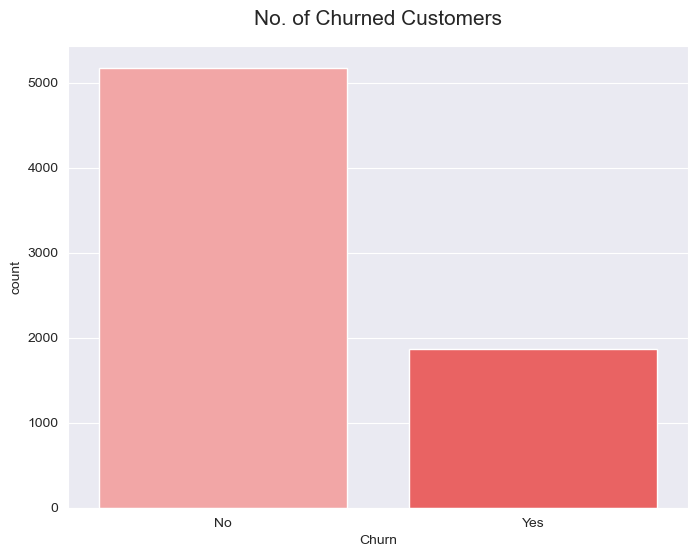

In [8]:
sns.countplot(x=churn_data['Churn'], palette=['#ff9999', '#ff4d4d'])  # Shades of pink and red
plt.title('No. of Churned Customers', fontsize=15)
plt.show()

The churn distribution showed a significant portion of churned customers close to 2000, visualized with a count plot. 
This initial visualization highlighted churn as a substantial issue, setting the foundation for deeper exploration.

# Data Cleaning

In [9]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
churn_df= churn_data.copy()
churn_df['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
#Dropping the null values
churn_df.dropna(inplace=True)

Null values in TotalCharges were filled or removed, as these missing values were associated with new customers without full billing cycles.

In [13]:
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
churn_df1=churn_df.copy()

churn_df1.drop(['customerID'],axis=1,inplace=True)
churn_df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
churn_df.duplicated().sum()

0

In [15]:
churn_df['tenure'].max() #The max tenure is 72 months or 6 years

72

In [16]:
# Group the tenures in bins of 12 months
labels = ["{0} - {1}".format(i,i+11) for i in range (1,72,12)]
churn_df['tenure_group'] = pd.cut(churn_df['tenure'], range(1,80,12), right=False, labels=labels)

In [17]:
churn_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

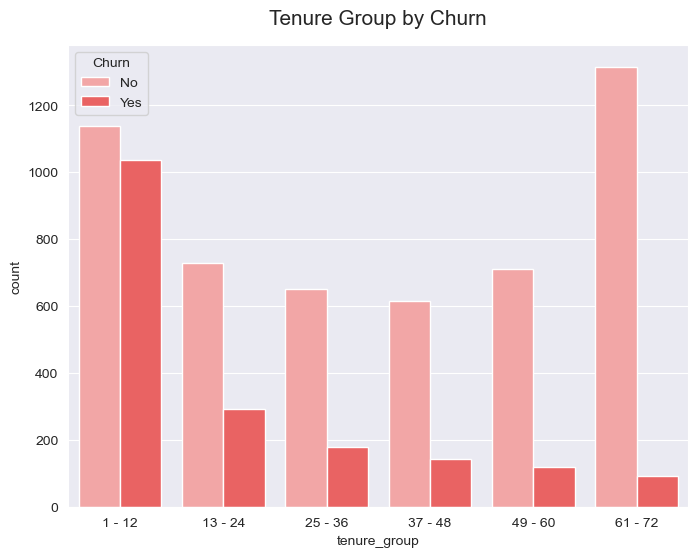

In [18]:
sns.countplot(x='tenure_group', hue='Churn', data=churn_df, palette=['#ff9999', '#ff4d4d'])  # Pink and red colors
plt.title('Tenure Group by Churn', fontsize=15)
plt.show()


Grouping customers by tenure showed that shorter tenure groups (less than 12 months) had higher churn rates. 
This finding implies that early-stage customers are more likely to leave, suggesting a need for improved onboarding and early engagement strategies.

In [38]:
churn_df.drop(['customerID','tenure'],axis=1,inplace=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Outlier Detection

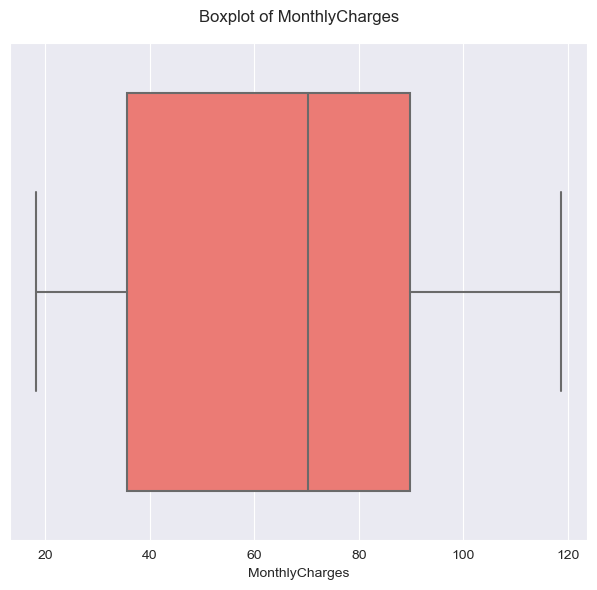

In [39]:

plt.figure(figsize=(12, 6))

# Plot for 'MonthlyCharges' column, set the color to red
plt.subplot(1, 2, 2)
sns.boxplot(x=churn_df['MonthlyCharges'], color='#FF6961')
plt.title('Boxplot of MonthlyCharges')

# Show the plots
plt.tight_layout()
plt.show()


In a typical boxplot, outliers are represented as points outside the "whiskers" (the lines extending from the box). However, in this plot, there are no points outside the whiskers, suggesting that there are no extreme outliers in MonthlyCharges.Most customers have monthly charges between 40 and 90, with a few on the lower and higher ends.  This indicates a fairly consistent distribution of monthly charges across customers, without significant anomalies.In a typical boxplot, outliers are represented as points outside the "whiskers" (the lines extending from the box). However, in this plot, there are no points outside the whiskers, suggesting that there are no extreme outliers in MonthlyCharges. This indicates a fairly consistent distribution of monthly charges across customers, without significant anomalies.

# Data Preprocessing

### One-hot encoding

In [41]:
# Converting binary columns to 0 and 1
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    churn_df[col] = churn_df[col].apply(lambda x: 1 if x == 'Yes' else 0)



Columns like Partner, Dependents, PhoneService, PaperlessBilling, and Churn were encoded into binary values (0 and 1), allowing for easier model processing.

In [42]:

# One-hot encode categorical features
churn_df = pd.get_dummies(churn_df, drop_first=True)

print(churn_df.head())  # Verify the changes

   SeniorCitizen  Partner  Dependents  PhoneService  PaperlessBilling  \
0              0        1           0             0                 1   
1              0        0           0             1                 0   
2              0        0           0             1                 1   
3              0        0           0             0                 0   
4              0        0           0             1                 1   

   MonthlyCharges  TotalCharges  Churn  gender_Male  \
0           29.85         29.85      0        False   
1           56.95       1889.50      0         True   
2           53.85        108.15      1         True   
3           42.30       1840.75      0         True   
4           70.70        151.65      1        False   

   MultipleLines_No phone service  ...  Contract_One year  Contract_Two year  \
0                            True  ...              False              False   
1                           False  ...               True             

# Data Correlation

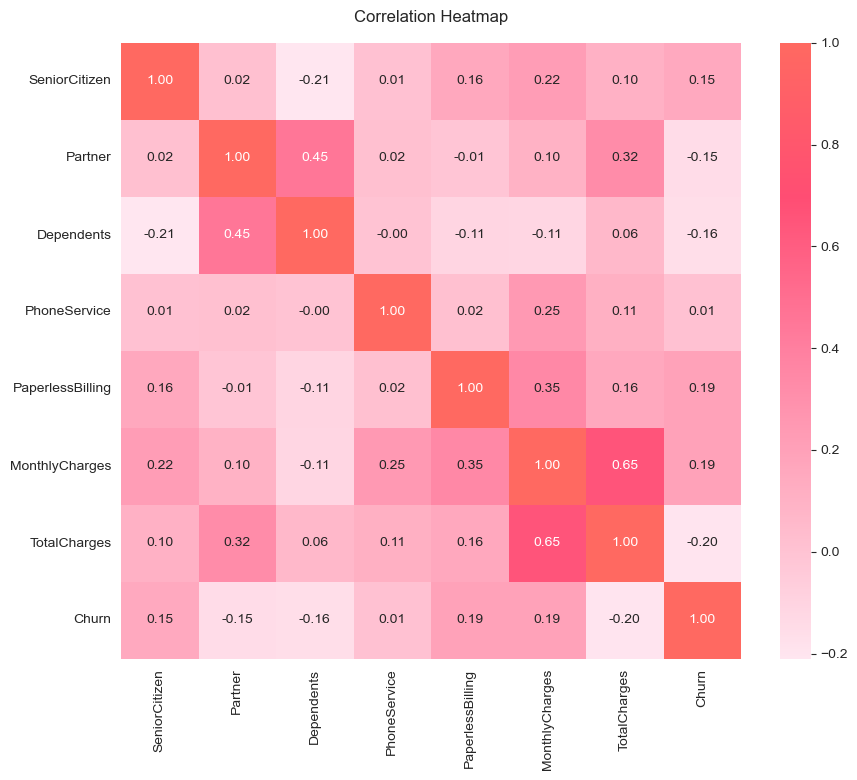

In [51]:
# Selecting numeric columns for correlation
numeric_df = churn_df.select_dtypes(include=['float64', 'int64'])
pink_cmap = LinearSegmentedColormap.from_list('custom_pink', ['#ffe6f0', '#ffb3c6', '#ff80a0', '#ff4d73', '#FF6961'])
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap=pink_cmap, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

MonthlyCharges and TotalCharges displayed a strong correlation, as expected. These financial attributes are linked, reflecting the cumulative charges for each customer.

A moderate negative correlation was observed between tenure and churn, supporting the initial EDA finding that long-term customers have a lower likelihood of churning.

# EDA

In [61]:
#Split the data into features (X) and target (y)
X = churn_df.drop('Churn', axis=1)
y = churn_df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [62]:
print("Before OverSampling- counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling- counts of label '1': 1308
Before OverSampling- counts of label '0': 3614 



# Applying SMOTEENN- Handle Class Imbalance

In [78]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)

print("After OverSampling with SMOTEENN - '1': {}".format(sum(y_resampled==1)))
print("After OverSampling with SMOTEENN - '0': {}".format(sum(y_resampled==0)))

After OverSampling with SMOTEENN - '1': 3048
After OverSampling with SMOTEENN - '0': 2154


Churn data is typically imbalanced, with fewer churned than retained customers. To address this, the SMOTEENN technique was applied, combining over-sampling of the minority class with under-sampling of the majority class, balancing the dataset and improving model performance.

In [79]:
def print_report(model,X_test,y_test,y_pred):
    """
    returns the model score, confusion matrix and classfication report
    """
    print("Model Score : {} \n ".format(model.score(X_test, y_test)))
    print("Confusion Matrix : \n {}\n".format(confusion_matrix(y_test,y_pred)))
    print("Accuracy : {}".format( round(accuracy_score(y_test, y_pred)*100, 2)))
    print("Classification report : \n\n"+classification_report(y_test, y_pred, labels=[0,1]))
    

# Model Building

# Logistic Regression

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Using MinMaxScaler to scale the variables in logistic regression so that all of them are within a range of 0 to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


#Model fitting
model_lr = LogisticRegression(solver='lbfgs',max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print_report(model_lr,X_test,y_test,y_pred)
lr = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.775408670931059 
 
Confusion Matrix : 
 [[899 110]
 [206 192]]

Accuracy : 77.54
Classification report : 

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1009
           1       0.64      0.48      0.55       398

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.78      0.77      1407



In [82]:
sm = SMOTEENN()

X_resampled, y_resampled = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resampled, y_resampled,test_size=0.2)

model_lr_smote = LogisticRegression(solver='lbfgs',max_iter=1000)
model_lr_smote.fit(Xr_train,yr_train)

yr_pred = model_lr_smote.predict(Xr_test)
print_report(model_lr_smote,Xr_test,yr_test,yr_pred)
lr_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.9144230769230769 
 
Confusion Matrix : 
 [[390  48]
 [ 41 561]]

Accuracy : 91.44
Classification report : 

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       438
           1       0.92      0.93      0.93       602

    accuracy                           0.91      1040
   macro avg       0.91      0.91      0.91      1040
weighted avg       0.91      0.91      0.91      1040



# Random Forest

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model_rf=RandomForestClassifier(n_estimators=200, criterion='gini',max_depth=3, min_samples_leaf=2)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
print_report(model_rf,X_test,y_test,y_pred)
rf = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.7455579246624022 
 
Confusion Matrix : 
 [[991  18]
 [340  58]]

Accuracy : 74.56
Classification report : 

              precision    recall  f1-score   support

           0       0.74      0.98      0.85      1009
           1       0.76      0.15      0.24       398

    accuracy                           0.75      1407
   macro avg       0.75      0.56      0.55      1407
weighted avg       0.75      0.75      0.68      1407



In [83]:
sm = SMOTEENN()

X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=200, criterion='gini', random_state = 100,max_depth=4, min_samples_leaf=8)

model_rf_smote.fit(Xr_train,yr_train)
yr_pred = model_rf_smote.predict(Xr_test)

print_report(model_rf_smote,Xr_test,yr_test,yr_pred)
rf_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.9080459770114943 
 
Confusion Matrix : 
 [[361  58]
 [ 38 587]]

Accuracy : 90.8
Classification report : 

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       419
           1       0.91      0.94      0.92       625

    accuracy                           0.91      1044
   macro avg       0.91      0.90      0.90      1044
weighted avg       0.91      0.91      0.91      1044



# PCA

In [84]:
# Applying PCA
from sklearn.decomposition import PCA
pcas = PCA(0.9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

X_train_pca = pcas.fit_transform(X_train)
X_test_pca = pcas.transform(X_test)
model_pca=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=4, min_samples_leaf=8)
model_pca.fit(X_train_pca,y_train)

y_pred_pca = model_pca.predict(X_test_pca)

print_report(model_pca,X_test_pca,y_test,y_pred_pca)
pca = round(accuracy_score(y_test, y_pred_pca)*100, 2)

Model Score : 0.7484008528784648 
 
Confusion Matrix : 
 [[969  40]
 [314  84]]

Accuracy : 74.84
Classification report : 

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1009
           1       0.68      0.21      0.32       398

    accuracy                           0.75      1407
   macro avg       0.72      0.59      0.58      1407
weighted avg       0.73      0.75      0.70      1407



In [85]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train, Xr_test, yr_train, yr_test=train_test_split(X_resample, y_resample,test_size=0.2)
pcas = PCA(0.9)

Xr_train_pca = pcas.fit_transform(Xr_train)
Xr_test_pca = pcas.transform(Xr_test)
model_pca_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8)
model_pca_smote.fit(Xr_train_pca,yr_train)

yr_pred_pca = model_pca_smote.predict(Xr_test_pca)

print_report(model_pca_smote,Xr_test_pca,yr_test,yr_pred_pca)
pca_smote = round(accuracy_score(yr_test, yr_pred_pca)*100, 2)

Model Score : 0.9164237123420796 
 
Confusion Matrix : 
 [[382  50]
 [ 36 561]]

Accuracy : 91.64
Classification report : 

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       432
           1       0.92      0.94      0.93       597

    accuracy                           0.92      1029
   macro avg       0.92      0.91      0.91      1029
weighted avg       0.92      0.92      0.92      1029



# AdaBoost

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, algorithm='SAMME.R')

model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)

print_report(model_ada,X_test,y_test,y_pred)
ada = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.7931769722814499 
 
Confusion Matrix : 
 [[933 100]
 [191 183]]

Accuracy : 79.32
Classification report : 

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [87]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_ada_smote = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, algorithm='SAMME')
model_ada_smote.fit(Xr_train, yr_train)

yr_pred = model_ada_smote.predict(Xr_test)
print_report(model_ada_smote,Xr_test,yr_test,yr_pred)
ada_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.9237623762376238 
 
Confusion Matrix : 
 [[408  50]
 [ 27 525]]

Accuracy : 92.38
Classification report : 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       458
           1       0.91      0.95      0.93       552

    accuracy                           0.92      1010
   macro avg       0.93      0.92      0.92      1010
weighted avg       0.92      0.92      0.92      1010



# XGBoost

In [88]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model_xgb = XGBClassifier(n_estimators=200,max_depth=3)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

print_report(model_xgb,X_test,y_test,y_pred)
xgb = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.7761194029850746 
 
Confusion Matrix : 
 [[889 120]
 [195 203]]

Accuracy : 77.61
Classification report : 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1009
           1       0.63      0.51      0.56       398

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



In [89]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_xgb_smote= XGBClassifier(n_estimators=200,max_depth=3)
model_xgb_smote.fit(Xr_train, yr_train)
yr_pred = model_xgb_smote.predict(Xr_test)

print_report(model_xgb_smote,Xr_test,yr_test,yr_pred)
xgb_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.9605009633911368 
 
Confusion Matrix : 
 [[424  16]
 [ 25 573]]

Accuracy : 96.05
Classification report : 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       440
           1       0.97      0.96      0.97       598

    accuracy                           0.96      1038
   macro avg       0.96      0.96      0.96      1038
weighted avg       0.96      0.96      0.96      1038



# Best Performing Model

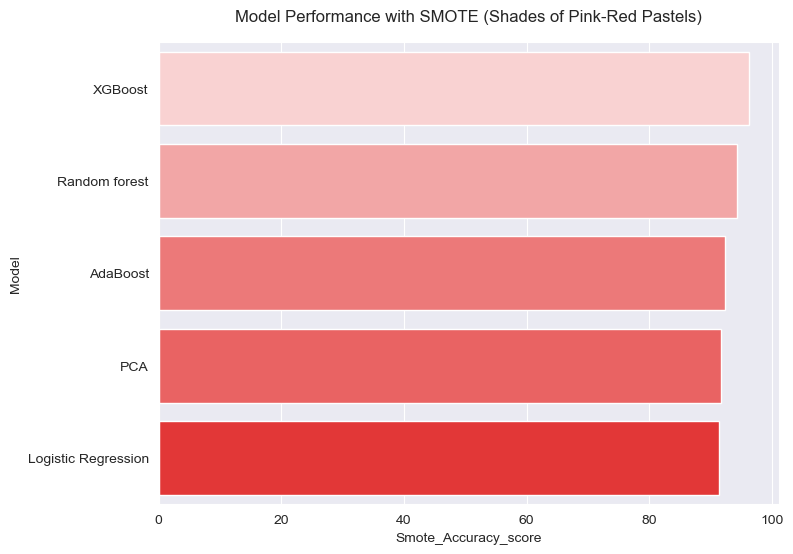

                 Model  Accuracy_score  Smote_Accuracy_score
0              XGBoost           77.61                 96.28
1        Random forest           74.56                 94.36
2             AdaBoost           79.32                 92.38
3                  PCA           74.84                 91.64
4  Logistic Regression           77.54                 91.44


In [107]:

# Define a custom pastel pink-red color palette
pastel_pink_red_palette = sns.color_palette(["#ffcccc", "#ff9999", "#ff6666", "#ff4d4d", "#ff1a1a"])

# Create the DataFrame (example values for demonstration)
models = pd.DataFrame({
    'Model': ['Random forest', 'Logistic Regression', 'PCA', 'AdaBoost', 'XGBoost'],
    'Accuracy_score': [rf, lr, pca, ada, xgb],
    'Smote_Accuracy_score': [rf_smote, lr_smote, pca_smote, ada_smote, xgb_smote]
})

# Plot the barplot with the custom pastel palette
sns.barplot(x='Smote_Accuracy_score', y='Model', palette=pastel_pink_red_palette,
            data=models.sort_values(by='Smote_Accuracy_score', ascending=False, ignore_index=True))

# Display the plot
plt.title('Model Performance with SMOTE (Shades of Pink-Red Pastels)')
plt.show()

# Optionally, display the sorted DataFrame
models_sorted = models.sort_values(by='Smote_Accuracy_score', ascending=False, ignore_index=True)
print(models_sorted)


### Model Comparisons:

Several models were tested for accuracy, recall, and other metrics, comparing baseline results with SMOTE-enhanced data. Key models included:

Logistic Regression: As a baseline model, logistic regression offered interpretability and established initial performance metrics. With SMOTE, its accuracy improved, although it performed moderately compared to other models.

Random Forest: This ensemble method provided robustness and feature importance insights. The model improved in accuracy with SMOTE, performing well in detecting churn.

AdaBoost: As a boosting algorithm, AdaBoost achieved reasonable accuracy but was sensitive to parameter changes. With SMOTE, it showed good recall, indicating its capability in handling imbalanced data.

XGBoost: After hyperparameter tuning, XGBoost emerged as one of the best models with high accuracy and AUC scores, proving effective at handling complex relationships and imbalances in the data.

# Hyperparameter Tuning

In [94]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],               # Number of trees in the forest
    'max_depth': [3, 5, 7, 10],                    # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],             # Learning rate
    'subsample': [0.6, 0.8, 1.0],                  # Fraction of samples used for fitting
    'colsample_bytree': [0.6, 0.8, 1.0],           # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2],                        # Regularization parameter
    'min_child_weight': [1, 3, 5],                 # Minimum sum of instance weight (hessian) needed in a child
}

# Initialize the XGBoost classifier
model_xgb_smote = XGBClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_xgb_smote, param_distributions=param_grid,
                                   n_iter=10, scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model with the resampled data (SMOTEENN)
random_search.fit(Xr_train, yr_train)

# Best parameters
print("Best Parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters found:  {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}


Hyperparameter tuning was performed for XGBoost using RandomizedSearchCV, optimizing parameters like n_estimators, max_depth, learning_rate, and subsample. 

This tuning further improved XGBoost’s accuracy and recall, enhancing its ability to identify churned customers accurately.

# XGBoost after Hyperparameter tuning

In [98]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_xgb_smote = XGBClassifier(subsample=0.8, 
                                n_estimators=300, 
                                min_child_weight=1, 
                                max_depth=5, 
                                learning_rate=0.1, 
                                gamma=0.1, 
                                colsample_bytree=0.6)
model_xgb_smote.fit(Xr_train, yr_train)
yr_pred = model_xgb_smote.predict(Xr_test)

print_report(model_xgb_smote,Xr_test,yr_test,yr_pred)
xgb_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.9627862595419847 
 
Confusion Matrix : 
 [[418  16]
 [ 23 591]]

Accuracy : 96.28
Classification report : 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       434
           1       0.97      0.96      0.97       614

    accuracy                           0.96      1048
   macro avg       0.96      0.96      0.96      1048
weighted avg       0.96      0.96      0.96      1048



# Model Evaluation (AUC Score, ROC Curve)

XGBoost AUC Score: 0.9949751572374248


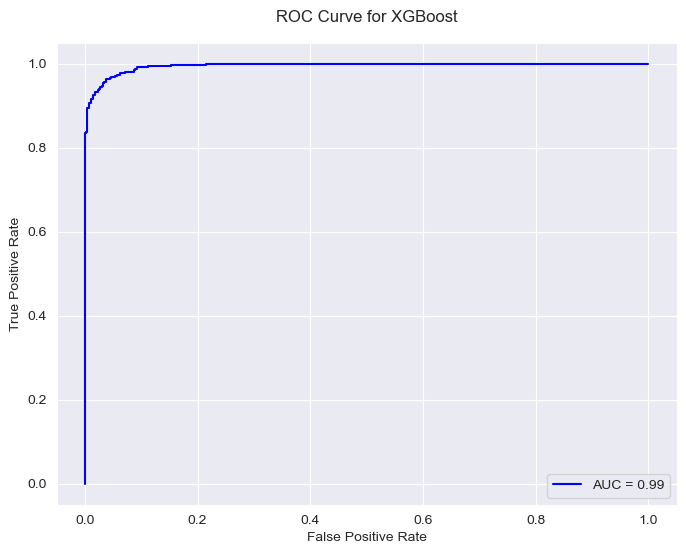

In [101]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate AUC Score for XGBoost model
y_pred_proba = model_xgb_smote.predict_proba(Xr_test)[:, 1]  # Probabilities of the positive class
auc_score = roc_auc_score(yr_test, y_pred_proba)
print(f"XGBoost AUC Score: {auc_score}")

# Plot ROC Curve for XGBoost model
fpr, tpr, _ = roc_curve(yr_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


The ROC curve for XGBoost displayed an AUC score, signifying its ability to separate churned from non-churned customers effectively.

An AUC closer to 1 indicates excellent model performance, and XGBoost’s tuned model performed best in this metric, making it an ideal choice for deployment.

# Feature Importance

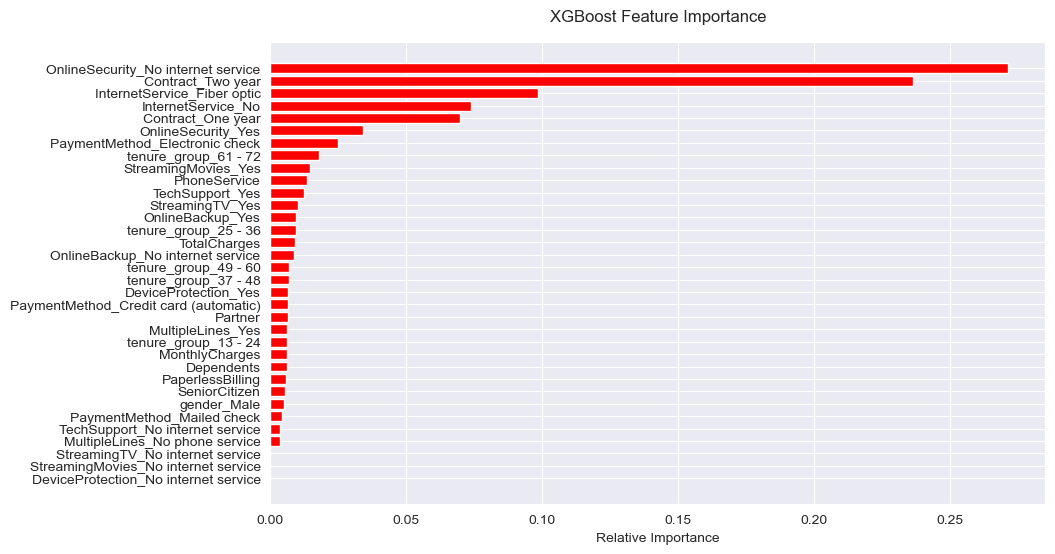

In [105]:

# Get feature importances from the XGBoost model
importances = model_xgb_smote.feature_importances_

# Get the feature names (assuming you used the X dataset with named columns)
features = X.columns

# Sort the features by importance
indices = np.argsort(importances)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.barh(range(len(indices)), importances[indices], color='r', align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Top Predictors: Features like Contract, MonthlyCharges, TotalCharges, and tenure were among the most important. This insight validates earlier findings, confirming that contract type and monthly charges are significant churn predictors.


Service Features: Features such as OnlineSecurity, TechSupport, and StreamingTV also showed importance, reinforcing the idea that bundled services contribute to customer retention.

## Conclusion


This comprehensive churn analysis demonstrates the power of data-driven insights and machine learning models in predicting and understanding churn. By focusing on tenure, contract type, and service usage, telecom companies and similar industries can make informed, targeted efforts to reduce churn and boost customer loyalty. The business impact of churn prediction is substantial, as retention strategies derived from these models can lead to long-term revenue growth and customer satisfaction. 

Through model comparisons, XGBoost emerged as the top-performing model due to its high accuracy, recall, and AUC scores, particularly after hyperparameter tuning and applying SMOTEENN for class balancing. Its robust handling of complex data patterns and superior predictive power make it an ideal choice for deployment in a real-world setting.